In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')

from skimage.io import imread, imshow
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

ModuleNotFoundError: No module named 'cv2'

In [2]:
input_dir = r'D:\Sem4\Data_298B_Project\298B_Data'
categories = ['African_Swine_Fever', 'Dry_Skin', 'Erysipelas', 'Foot_and_Mouth_Disease', 'Greasy_Pig_Disease', 'Hog_Cholera', 'Mastitis', 'PDNS', 'Pityriasis_Rosea', 'Ringworm','Sarcoptic_mange', 'Swine_Pox', 'Swine_Vesicular_Disease']

In [3]:
data = []
labels = []

In [4]:
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        data.append(img)
        labels.append(category_idx)

In [5]:
# Count the number of images in each category
category_counts = {category: len(os.listdir(os.path.join(input_dir, category))) for category in categories}

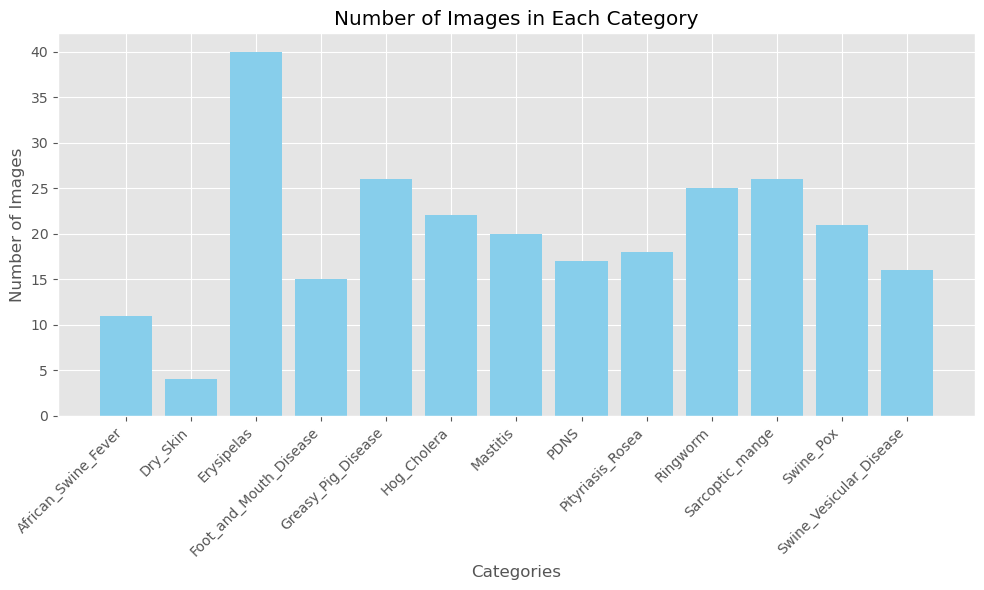

In [6]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

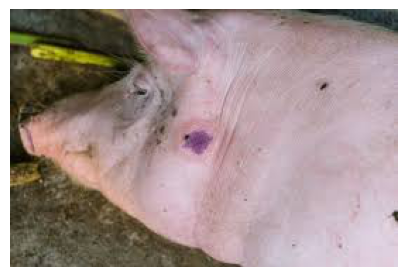

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(data[29])
ax.axis('off')
plt.show()

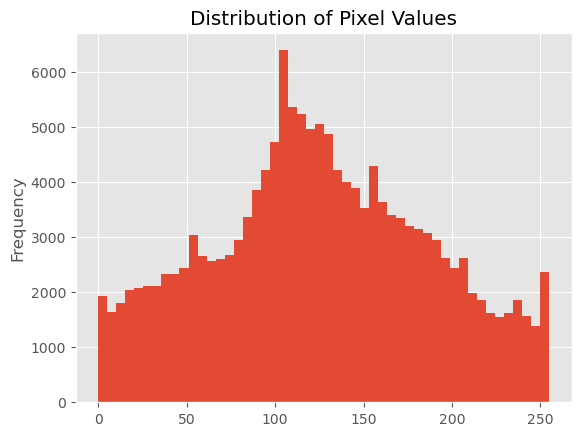

In [8]:
pd.Series(data[1].flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

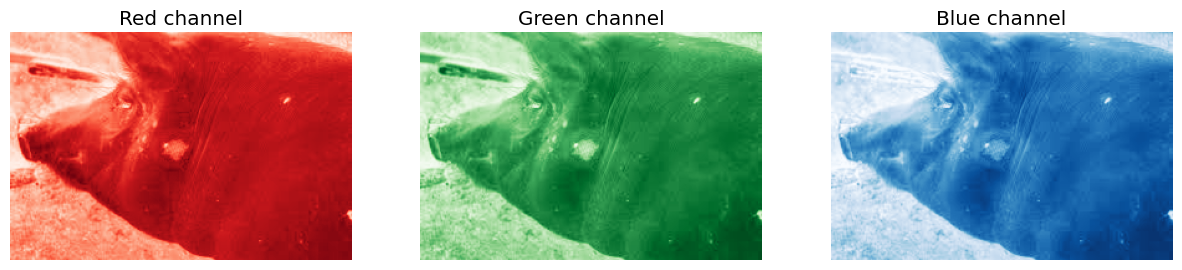

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(data[29][:,:,0], cmap='Reds')
axs[1].imshow(data[29][:,:,1], cmap='Greens')
axs[2].imshow(data[29][:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

In [12]:
min_size = [float('inf')] * 3
max_size = [0] * 3
min_size_img = None
max_size_img = None

for idx, img in enumerate(data):
    size = img.shape
    for i in range(3):
        if size[i] < min_size[i]:
            min_size[i] = size[i]
            min_size_img = idx
        if size[i] > max_size[i]:
            max_size[i] = size[i]
            max_size_img = idx

print("Index of image with minimum size:", min_size_img)
print("Minimum size image shape:", data[min_size_img].shape)

print("Index of image with maximum size:", max_size_img)
print("Maximum size image shape:", data[max_size_img].shape)

Index of image with minimum size: 71
Minimum size image shape: (84, 150, 3)
Index of image with maximum size: 215
Maximum size image shape: (2057, 3517, 3)


In [13]:
resized_data = []
for img in data:
    resized_img = resize(img, (220, 220))
    resized_data.append(resized_img)

In [14]:
min_size = [float('inf')] * 3
max_size = [0] * 3
min_size_img = None
max_size_img = None

for idx, img in enumerate(resized_data):
    size = img.shape
    for i in range(3):
        if size[i] < min_size[i]:
            min_size[i] = size[i]
            min_size_img = idx
        if size[i] > max_size[i]:
            max_size[i] = size[i]
            max_size_img = idx

print("Minimum size:", min_size)
print("Maximum size:", max_size)

print("Index of image with minimum size:", min_size_img)
print("Minimum size image shape:", data[min_size_img].shape)

print("Index of image with maximum size:", max_size_img)
print("Maximum size image shape:", data[max_size_img].shape)

Minimum size: [220, 220, 3]
Maximum size: [220, 220, 4]
Index of image with minimum size: 0
Minimum size image shape: (168, 299, 3)
Index of image with maximum size: 11
Maximum size image shape: (407, 577, 4)


In [15]:
flat_data = []
for img in resized_data:
    flat_data.append(img.flatten())

In [16]:
data = np.array(flat_data, dtype=object)
labels = np.array(labels)

In [17]:
data.shape

(261,)

In [16]:
# train / test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# predict using Random Forest classifier
rf_pred = rf.predict(x_test)


ValueError: setting an array element with a sequence.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score# Create and fit Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1_score = f1_score(y_test, rf_pred, average='weighted')